<a href="https://colab.research.google.com/github/aneetat1/NASA-SEES-Internship/blob/main/Aneeta_Thokkadam_SEES_3_CMD_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aneeta Thokkadam, Climate Disaster Preparedness (O-CD), 07/01/2022** 🌳

#Setup Google Drive access for data input and output

Because we are working in Colab, we are going to import a special module called drive that we will use to upload and download files to and from our own Google Drive folders. *This code block is not mentioned or used in the PyaR tutorial.*

When you run the following code block, a window will appear. It asks **"Permit this notebook to access your Google Drive files?"** Choose the option to **Connect to Google Drive**.

Next a window displays that asks you to **Choose an account**. Choose the account that you use for this Google Classroom. 

Finally, you will see one more window that states **Google Drive for Desktop wants to access your Google account**. Scroll down to see the options and choose **Allow**. You may receive a security alert from Google. Be aware that Google Drive access is discontinued when the notebook is closed or disconnected.

After mounting your Google drive, you may need to click the Refresh icon to see it. It is simply named `drive`.



In [ ]:
# Step 1 - Mounting the Google Drive. User will need to give access to their 
#          Google drive for reading/writing data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The next sections about the os module are not mentioned in the PyAR video. These sections are specific to our Google Classroom & Colab version of the notebook.

## Import the os module
In Python, the os (operating system) module is used, among other things, to create new folders (also called directories) and to work with computer file names. We need to be able to access data files as input to our code. We also want to write out new files. In both cases, we need to create variables that reference the complete path from the operating systems root directory to the input or output file. 

In this notebook, we will use a special function, `os.path`, to construct the full path. The useful thing about this function is that it deciphers your computer's operating system directory system to construct complete filenames, as long as you feed it the correct folder names in correct order. Read more about `os.path` at [python.org](https://docs.python.org/3/library/os.path.html)

In [ ]:
import os
from os import path as path

## Create a new folder
We are going to use an os module function to create a new folder in your Google Drive MyDrive folder. Note that you can name the folder however you like, but if you do, be sure to update your variables where necessary later on in the notebook.
The next code cell will check to see if the desired folder already exists. If it has not been created, we will create it. This is helpful in the case that we run this notebook multiple times.

In [ ]:
new_path = '/content/drive/MyDrive/mySEES'
# The follwong statement returns True if the folder has already been created.
check_folder = os.path.isdir(new_path)

if not check_folder:
  # If the check_folder Boolean value is True, not check_folder will be false.
  # Let's make a new folder named mySEES for our output
  os.makedirs(new_path)
  print("Created folder: {}".format(new_path))
else:
   print("Folder {} already exists.".format(new_path))

Folder /content/drive/MyDrive/mySEES already exists.


## Create variables for input and output folders in your Google Drive

Look to the left side of the web browser window and notice a series of icons arranged from top to bottom. They include a Table of Contents icon, a Search icon, and others. Look for the folder icon and click/tap to expand. You will see at least three folder icons. One shows an up arrow and takes you to your Google Drive's root folder. A second is labeled *drive* and a third is labeled *sample data*. Expand the *drive* folder to see a folder labeled *MyDrive*. Expand the *MyDrive* to see your *Classroom* folder, your *sip_data* folder, and your newly created  *mySEES* folder. If you do not see your *sip_data* folder, return to the **Start Here** section of the classroom and complete the Google Colaboratory Setup.

One nice trick that you can use to correctly write out the path of your input data folder (sip_data) is the following:


1.   Highlight your sip_data folder
2.   Click the three vertical dots that appear at right
3.   Choose the option to *Copy path*

Now you can easily paste the full path to the sip_data folder into a code cell. Uncomment and change line 3 in the following code cell if your full path is different.



In [ ]:
# here is the standard path if your placed the sip_data folder as directed
in_dir = '/content/drive/MyDrive/sip_data'
#in_dir = '' # Otherwise, uncomment and paste your path here. 
print("My path to the sip_data folder is {}".format(in_dir))

My path to the sip_data folder is /content/drive/MyDrive/sip_data


Go through the same process to copy the path to your mySEES folder, which we will call *out_dir*.

In [ ]:
# here is the standard path to your new mySEES folder 
out_dir = '/content/drive/MyDrive/mySEES'
#out_dir = '' # If needed, uncomment and paste your path here. 
print("My path to the mySEES folder is {}".format(out_dir))

My path to the mySEES folder is /content/drive/MyDrive/mySEES


# Welcome to the Color Magnitude Diagram (CMD) activity!
Now we return to topics covered in the SIP video.

In this activity, you will be making your own color magnitude diagram of the stars in Andromeda targeted by the SPLASH survey. 

As usual with Jupyter, begin by importing the packages you'll be needing by clicking on the first code cell and pressing `Ctrl+Enter` (Windows) or `Command+Enter` (Mac). On a tablet or smartphone press the `Run` icon. For this activity, you need to import the `numpy` and `matplotlib` modules.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

This next cell is my preferred setting for making plots; I like big font and serifs! Feel free to change if you have a different preference! (Note: the original notebook author is talking about their personal font preferences here. Yours may vary.)

In [ ]:
mpl.rcParams['font.family']='serif'
mpl.rcParams['font.size']=14

This function initializes the CMD plot and labels the axes. No data is plotted in this function. You don't need to modify this function.

In [ ]:
def InitializePlot():
    plt.clf() ##set up a blank figure
    f= plt.figure(figsize=(8,8)) ##set up size of the plot
    plt.xlim(-1, 9)
    plt.ylim(24, 18)
    plt.xlabel('F475W - F814W (mag)')
    plt.ylabel('F814W (mag)')

This function writes a catalog. It takes as arguments the name of the file,  the different quantities you want to put in the catalog, and the names of these quantities. You do not need to modify this function.

In [ ]:
def WriteCatalog(catalogName, params, paramNameString):
    #first, create and open the text file for writing. Choose a name: 
    catalog = open(catalogName, 'w') ##creates a blank file

    #write first row
    catalog.write('# ' + paramNameString + '\n') ##creates a header

    #then, loop through stars and write 1 row for each star.
    for i in range(len(params[0])): #loop over stars
        for j in range(len(params)): #loop over parameters (ra, dec, v, verr,..)
            catalog.write(str(params[j][i]))
            catalog.write(' ')
        catalog.write('\n')
    catalog.close()

    return
    # the next statement will start a browser download of the file to your 
    # local computer. We won't run this here, but leave it as a reference
    #files.download(catalogName)

Okay, now that we have all our packages imported, we are ready to get to the science! The first thing we need to do is read in the file that contains all our data. This file contains the coordinates (ra, dec, xi, eta), the magnitudes (in two different bandpasses), and the velocities of all our stars (we will talk more about velocities next!). 

As we discussed, the color of the star is a very useful and important quantity; we define the array for "color" below.

## Make a variable for our input data file
We create a variable that references the data required for this notebook. This step is not mentioned in the PyAR video. It is specific to our Google Classroom version of the notebook.

In [ ]:
keck_hst_data = path.join(in_dir, 'keck_hst_data.txt')
print(keck_hst_data)

/content/drive/MyDrive/sip_data/keck_hst_data.txt


The next code cell reads in the data from the keck_hst_data.txt file into numpy arrays. Then a new array named color is calculated. This code block is modified from the PyAR video version.

In [ ]:
ra, dec, xi, eta, f475w, f814w, v, verr = np.loadtxt(keck_hst_data, unpack = True)
color = f475w - f814w
print("New variable color is of data type {}".format(type(color)))

New variable color is of data type <class 'numpy.ndarray'>


Now we can plot a color magnitude diagram of all the objects in our sample:

<Figure size 432x288 with 0 Axes>

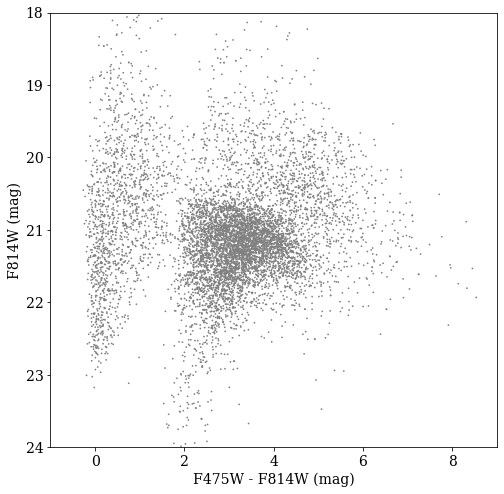

In [ ]:
f = InitializePlot()
plt.scatter(color, f814w, c = 'gray', s = 3, edgecolors = 'none')

Now that we have our CMD, we want to separate out the stars of different types: main sequence (MS) stars, red giant branch (RGB) stars, and asymptotic giant branch (AGB) stars. After our investigation, we want to write new star catalogs, each a subset of the original data file, keck_hst_data.txt. Let's begin with the catalog referenced in the example presented below.

In [ ]:
ms_catalog = path.join(out_dir, 'MScatalog.txt')
# print the result to make sure that the path is what you expect
print(ms_catalog)

/content/drive/MyDrive/mySEES/MScatalog.txt


After you read through the next text and code cells, add the other needed catalog variables here. We suggest that you use the same variable naming pattern.

In [ ]:
# Create the other needed star catalogs in this code cell.
rgb_catalog = path.join(out_dir, 'RGB_tmpl.txt')
print(rgb_catalog)
agb_catalog = path.join(out_dir, 'AGB_tmpl.txt')
print(agb_catalog)

/content/drive/MyDrive/mySEES/RGB_tmpl.txt
/content/drive/MyDrive/mySEES/AGB_tmpl.txt


The below cell selects the main sequence stars and plots them in blue on top of the CMD. It then writes a catalog in your "data" folder that contains the information only for the MS stars.

What you'll be doing is adapting and adding to the code below to do the same for the RGB and AGB stars. You want to color code the RGB and AGB stars on the plot, add the labels "AGB" and "RGB" to the plot, and write the RGB and AGB catalogs.

First run the cell to see the plot produced. Then, "uncomment" (meaning remove the lines with # signs--the # sign tells Python not to run the line) the line that begins "rgb=" and replace a, h, and k with numbers. To decide what numbers to choose, use the Divided_CMD.png file for inspiration. Look for this file your Google Classroom assignment (both Basic and Intermediate levels).  Plot your selected RGB stars, and then do the same for the AGB stars.

Reviewing a standard parabola equation is useful for selecting numbers to plug in to the RGB and AGB formulas.

<Figure size 432x288 with 0 Axes>

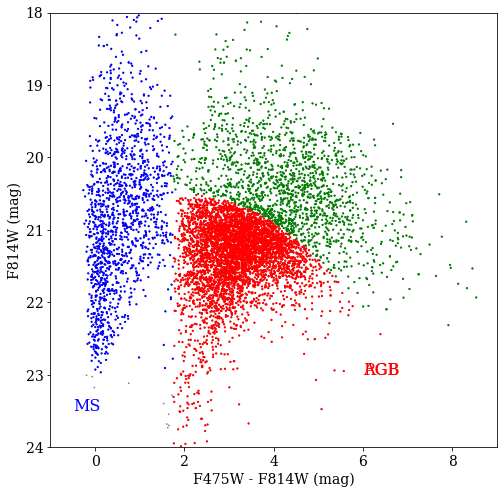

In [ ]:
#========From here on is the part that you're going to copy and
#adapt for the RGB and AGB stars===============================

#Where condition to isolate main sequence stars
ms = (color < 1.75) & (f814w < 23)

#Plot MS stars in blue on the plot and label that region 
f = InitializePlot()
plt.scatter(color, f814w, c = 'gray', s = 3, edgecolors = 'none')
plt.scatter(color[ms], f814w[ms], c = 'blue', edgecolors = 'none', s = 5)
plt.text(-0.5, 23.5, 'MS', color = 'blue', size = 16)

#Write a text file containing information for MS stars by calling the
#WriteCatalog function on the stars that satisfy the MS condition.
#You shouldn't modify the WriteCatalog function itself;
#only copy and modify the line below for the AGB and RGB groups. 
WriteCatalog(ms_catalog,
             [ra[ms], dec[ms], xi[ms], eta[ms], f475w[ms], f814w[ms], v[ms], verr[ms]],
             'RA DEC XI ETA F475W F814W V VERR')

#==============================================================
#Replace a, h, and k with numbers, and see what happens 
a = 0.1
h = 2
k = 20.5
rgb= (color > 1.75 ) & (f814w > a*(color-h)**2.+k)
plt.scatter(color[rgb], f814w[rgb], c = 'red', edgecolors = 'none', s = 5)
plt.text(6, 23, 'RGB', color = 'red', size = 16)
WriteCatalog(rgb_catalog,
             [ra[rgb], dec[rgb], xi[rgb], eta[rgb], f475w[rgb], f814w[rgb], v[rgb], verr[rgb]],
             'RA DEC XI ETA F475W F814W V VERR')

##Add the RGB stars to the plot!

#Write the catalog here when you're happy with your selection! Go back 
#Then, add the AGB stars to the plot and write an AGB catalog as well!
#==============================================================
agb= (color > 1.75 ) & (f814w < a*(color-h)**2.+k)
plt.scatter(color[agb], f814w[agb], c = 'green', edgecolors = 'none', s = 5)
plt.text(6, 23, 'AGB', color = 'red', size = 16)
WriteCatalog(agb_catalog,
             [ra[agb], dec[agb], xi[agb], eta[agb], f475w[agb], f814w[agb], v[agb], verr[agb]],
             'RA DEC XI ETA F475W F814W V VERR')


In [ ]:
# Determine what fraction of the entire catalog are selected by the MS, RGB, and AGB criteria
nstars = len(color)
print('Fraction of stars on the MS: {0:.3f}'.format(np.sum(ms)/nstars))
print('Fraction of stars on the RGB: {0:.3f}'.format(np.sum(rgb)/nstars))
print('Fraction of stars on the AGB: {0:.3f}'.format(np.sum(agb)/nstars))
selected = ms | rgb | agb
print('Fraction of stars not selected: {0:.3f}'.format(np.sum(~selected)/nstars))

Fraction of stars on the MS: 0.155
Fraction of stars on the RGB: 0.513
Fraction of stars on the AGB: 0.173
Fraction of stars not selected: 0.160


# Preparing for the Basic Level Certificate

After you have attempted to run the notebook, watched the assigned videos, and possibly rerun the notebook, take the quiz to complete the requirements for Notebook 3. Be sure to generate the three output star catalogs. They will be used as input in Notebook 6.

We encourage you to complete the notebook and submit it as part of the Intermediate Level Certificate. You are almost there!

# Preparing for the Intermediate Level Certificate
When you have successfully completed the code that writes all three star catalogs, you can prepare this notebook for submission. 

Add a new text cell to the very top of your notebook. Write **your full name**, **your team code**, **your specific team name** and **the date** in the text block.

Make sure that your saved notebook shows your output by running all code cells. Your notebook is already located in the **Your work** area for this assignment.

In the **Your work** area for this assignment, use the **+ Add or create** option to add all of the star catalogs that you generated using the Python notebook code. Choose the **Google Drive** option. You might find the star catalog files in the **RECENT** pane, but you can also look in **MY DRIVE**. There, choose the **mySEES** folder. Choose the star catalogs, and then **INSERT**. You can add the files one by one, if that is easier.

Turn in your notebook and your newly written catalogs in the Google Classroom.

# CREDIT: Prof. Raja GuhaThakurta of UCSC and the Science Internship Program
This Python tutorial was originally developed by Dr. Raja GuhaThakurta and his astronomy graduate students as part of the [Science Internship Program (SIP)](http://ucsc-sip.org/about/) for Bay Area high school students at the University of California Santa Cruz (UCSC). Dr. GuhaThakurta's tutorial is called Python and Research (PyaR).

SEES thanks Dr. GuhaThakurta for his generosity in sharing Jupyter notebooks, video tutorials, data, and related resources.

In 2020, a SEES mentor adapted Dr. GuhaThakurta's tutorials to run in the Google Colaboratory. The current notebook has been updated for 2022 SEES.